<a href="https://colab.research.google.com/github/LuisPerdomo123/Inteligencia-Computacional/blob/main/Regression_MLP_Caso_Practico_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Keras: Implementando una RNA para regresión

## Conjunto de datos

### Descripción
Este conjunto de datos contiene información recopilada por el Servicio de Censos de los EEUU sobre viviendas en el área de Boston Mass. Se obtuvo del archivo StatLib (http://lib.stat.cmu.edu/datasets/boston), y se ha utilizado en oda la literatura para comparar diferentes algotritmos de Machine Learning.

Los datos fueron publicados originalmente por Harrison, D y Rubinfeld, D. L. Precios hedónicos y la demanda de aire limpio, J. Environ. Economics & Management, vol 5, 1978.


### Características del conjunto de datos
El conjunto de datos es pequeño, con solo 506 casos. Contienen 14 caracterísiticas que se describen a continuación:



*   CRIM: per capita crime rate by town.
*   ZN: proportion of residential land zoned for lots over 25.000 sq. ft.
*   INDUS: proportion if non-retail business acres per town.
*   CHAS: Charles River dummy variable (1 if tract bounds river: 0 otherwise)
*   NOX: nitric oxides concentration (parts per 10 million).
*   RM: average number of rooms per dwelling.
*   AGE: proportion of owner-occupied units built prior to 1940.
*   DIS: weighted distances to five Boston employment centres.
*   RAD: index of accessibility to radial highways.
*   TAX: full-vakue property-tax rate per 10.000 dollars.
*   PTRATIO: pupil-teacher ratio by twon.
*   B: 1000(Bk-0.63)2 where Bk is the proportion of blacks by town.
*   LSTAT: % lower status of the popullation.
*   MEDV: Median value of owner occupied homes in  dollars.

**El objetivo de nuestro problema de regresión es utilizar las 13 primeras características para predecir el valor de MEDV (que representa el precio de la vivienda).**

## 0. Imports

In [78]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [79]:
from tensorflow import keras

## 1. Definición del conjunto de datos de entrenamiento

### 1.1. Improtando el conjunto de datos

In [80]:
from tensorflow.keras import datasets

In [81]:
boston_housing = datasets.boston_housing

In [82]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [83]:
X_train.shape

(404, 13)

In [84]:
X_test.shape

(102, 13)

In [85]:
boston_housing.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [86]:
y_train.shape

(404,)

### 1.2. Visualizando el conjunto de datos

In [87]:
import pandas as pd
import numpy as np

In [88]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
            "LSTAT", "MEDV"]
df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


### 1.3. División del conjunto de datos
Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas (X_test)

In [89]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [90]:
X_test.shape

(51, 13)

In [91]:
X_val.shape

(51, 13)

## 2. Definición de la arquitectura de la Red Neuronal Artificial

In [92]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:
*   La primera capa estarpa formada por 30 neuronas.
*   La segunda capa estará formada por 10 neuronas
*   La última capa estara formada por 1 neurona

In [93]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

Una vez hemos definido la arquitectura de la Red Neuronal Artificial podemos visualizarla junto con el número total de parámetros utilizando el método summary()

In [94]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                420       
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.2. Acceso a los elementos definidos de la RNA

In [95]:
network.layers

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [96]:
hidden1 = network.layers[1]

In [97]:
weights, biases = hidden1.get_weights()

Como puede observarse en la siguientes celdas, Keras automáticamente inicializa el valor de los parámetros de manera aleatoria y los bias term con el valor 0.

In [98]:
weights

array([[ 0.05865538, -0.13805835, -0.18675587,  0.3061303 , -0.01595399,
         0.08288342, -0.10666987, -0.23406407,  0.0715737 , -0.03130713],
       [-0.10747635, -0.32250407, -0.21137367, -0.23880355, -0.2915752 ,
         0.34031028, -0.0200533 ,  0.37664378, -0.12106517,  0.3460763 ],
       [-0.04392102,  0.18006396,  0.18996662, -0.22347517, -0.07488278,
        -0.33431795,  0.11811125,  0.04640448, -0.03590718, -0.3588242 ],
       [ 0.29735404, -0.0067741 , -0.14708449, -0.23231691,  0.00370494,
         0.34304887,  0.06485364,  0.21538305, -0.15423459,  0.24948394],
       [-0.3629572 ,  0.22424924,  0.36815977, -0.33031347, -0.13407668,
         0.32338285, -0.3083157 ,  0.21800232, -0.18354468,  0.06018212],
       [ 0.2989117 , -0.14937441,  0.04948583,  0.37627918,  0.25199097,
        -0.3480942 ,  0.305529  ,  0.2902034 ,  0.24417615, -0.20433539],
       [ 0.02539909,  0.26448065,  0.35866517,  0.0008907 , -0.18703991,
         0.15908837, -0.13739876,  0.24552816

In [99]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 3. Configuración de la Red Neuronal Artificial

In [102]:
network.compile(loss='mean_squared_error',
                optimizer='sgd')

## 4. Preparación del conjunto de datos
Dabido a la forma en la que hemos definido la arquitectura de nuestra Red Neuronal Artificial y los parámetros de compilación, vamos a requerir realizar algunas transformaciones sobre nuestro conjunto de datos.

### 4.1. Preparación de las características de entrada

In [103]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

## 5. Entrenamiento de la Red Neuronal Artificial
En este punto ya estamos listos para entrenar nuestra Red Neuronal Artificial invocando el método fit(). Una de las capacidades que nos proporciona Keras es la de integrar el proceso de validación en el propio proceso de entrenamiento, para ello, junto con el subconjunto de datos de entrenamiento, debemos proporcionarle a este método el subconjunto de validación.

In [104]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=30,
                      validation_data=(X_val_prep, y_val))

Epoch 1/30
13/13 [==============================] - 1s 20ms/step - loss: 466.6108 - val_loss: 263.6201
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 99.5568 - val_loss: 83.9316
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 66.9727 - val_loss: 36.7008
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 42.3676 - val_loss: 28.5558
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 36.3952 - val_loss: 34.6718
Epoch 6/30
13/13 [==============================] - 0s 6ms/step - loss: 39.4021 - val_loss: 47.0288
Epoch 7/30
13/13 [==============================] - 0s 5ms/step - loss: 22.2642 - val_loss: 49.8742
Epoch 8/30
13/13 [==============================] - 0s 8ms/step - loss: 37.0240 - val_loss: 24.6883
Epoch 9/30
13/13 [==============================] - 0s 8ms/step - loss: 25.5775 - val_loss: 56.2256
Epoch 10/30
13/13 [==============================] - 0s 7ms/step - loss: 24.3099 - val_loss: 39.1

En la variable history se almacenan varios valores importante:
*     El valor de los parámetros del modelo después del entrenamiento.
*     La lista de epochs llevados a cabo.
*     Un diccionario con el error producido en cada epoch en el conjunto de datos de entrenamiento y validación.

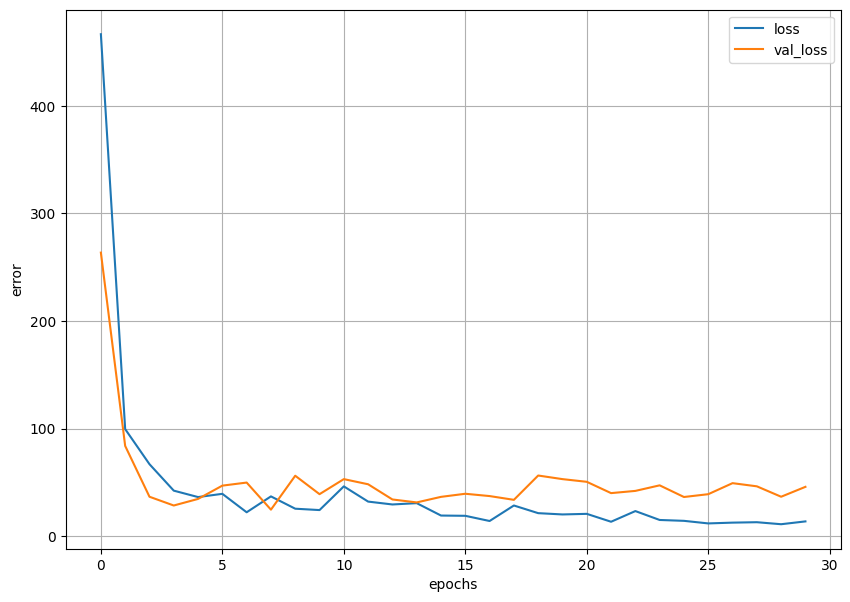

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

## 6. Validación con el conjunto de datos de pruebas

In [106]:
test_loss = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 15.7072


In [107]:
print('test_mse: ', test_loss)

test_mse:  15.707206726074219


## 7. Predicción de nuevos ejemplos

In [108]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[30]

In [110]:
# Representación gráfica del nuevo ejemplo que queremos predecir
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
            "LSTAT", "MEDV"]
df_new = pd.DataFrame([X_new], columns=features[:-1])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44


In [111]:
# Preprocesamos el nuevo ejemplo que queremos predecir
X_new_prep = scaler.transform(df_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
